<a href="https://colab.research.google.com/github/santiagorestrepoo09/Thesis_CNN-thorax-1.0/blob/main/TESIS_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from keras.layers import Input,Lambda, Dense, Flatten
from keras.models import Model

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob 
import matplotlib.pyplot as plt 

In [ ]:
IMAGE_SIZE = [224,224]

train_path = './drive/MyDrive/DATASET/DATA-SET/train'
valid_path = './drive/MyDrive/DATASET/DATA-SET/test'

In [ ]:
vgg = VGG16(input_shape= IMAGE_SIZE + [3], weights= 'imagenet' , include_top=False)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('./drive/MyDrive/DATASET/DATA-SET/train/*')
print(folders)
x = Flatten()(vgg.output)

['./drive/MyDrive/DATASET/DATA-SET/train/NORMAL', './drive/MyDrive/DATASET/DATA-SET/train/PNEUMONIA']


In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                    horizontal_flip =True)

test_datagen = ImageDataGenerator(rescale = 1./255)



In [ ]:
training_set = train_datagen.flow_from_directory('./drive/MyDrive/DATASET/DATA-SET/train',  
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('./drive/MyDrive/DATASET/DATA-SET/test',  
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [69]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
163/163 [==============================] - 3103s 19s/step - loss: 0.1796 - accuracy: 0.9220 - val_loss: 0.2759 - val_accuracy: 0.9103
Epoch 2/5
163/163 [==============================] - 3052s 19s/step - loss: 0.1014 - accuracy: 0.9613 - val_loss: 0.2543 - val_accuracy: 0.9167
Epoch 3/5
163/163 [==============================] - 3032s 19s/step - loss: 0.0989 - accuracy: 0.9638 - val_loss: 0.3654 - val_accuracy: 0.8926
Epoch 4/5
163/163 [==============================] - 3020s 19s/step - loss: 0.1189 - accuracy: 0.9605 - val_loss: 0.3468 - val_accuracy: 0.9022
Epoch 5/5
163/163 [==============================] - 3057s 19s/step - loss: 0.0770 - accuracy: 0.9709 - val_loss: 0.3498 - val_accuracy: 0.9135


In [70]:
import tensorflow as tf
from keras.models import load_model


model.save('./drive/MyDrive/DATASET/model/model_vgg16.h5')

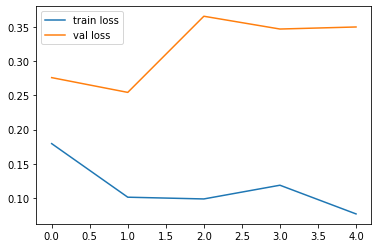

<Figure size 432x288 with 0 Axes>

In [71]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


In [73]:
from keras.models import load_model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3

model.load_weights('./drive/MyDrive/DATASET/model/model_vgg16.h5')
img = image.load_img('./drive/MyDrive/DATASET/DATA-SET/val/PNEUMONIA/person1946_bacteria_4875.jpeg' , target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)


result=int(classes[0][0])
resultado=classes[0]
respuesta=np.argmax(resultado)##[1]

print(result)


if result==0:
    print("Person is Affected By PNEUMONIA")
else:
    print("Result is Normal")


0
Person is Affected By PNEUMONIA
